# Planilhas no Excel

## Importando as Planilhas

In [16]:
import pandas as pd

In [17]:
df1 = pd.read_excel("/content/drive/MyDrive/Datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Datasets/Salvador.xlsx")

In [18]:
df = pd.concat([df1,df2,df3,df4,df5])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [19]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [20]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [21]:
df["LojaID"] = df["LojaID"].astype("object")
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [22]:
# Consultando as linhas com valores faltantes.
df.isnull().sum()

Cidade    0
Data      0
Vendas    7
LojaID    0
Qtde      0
dtype: int64

In [29]:
# Substituindo os valores nulos pela média.
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)
df.isnull().sum()
# Inplace é a modificação em memória (permanente).

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [30]:
# Substituindo os valores nulos por zero.
# df["Vendas"].fillna(0, inplace=True)
# df.isnull().sum()

# Apagando as linhas com valores nulos.
# df.dropna(inplace=True)

# Apagando as linhas com valores nulos relativos a uma coluna.
# df.dropna(subset=["Vendas"], inplace=True)

# Apagando as linhas com valores nulos relativos a todas as coluna.
# df.dropna(how="all", inplace=True)

## Criando Colunas

In [31]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
# df["Receita/Vendas"] = df["Receita"] / df["Vendas"]
# df.head()

In [32]:
df["Receita"].max()

3544.0

In [33]:
df["Receita"].min()

3.34

In [34]:
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [36]:
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
92,Natal,2019-01-02,4.57,1035,1,4.57
92,Salvador,2019-01-01,4.57,1035,1,4.57


In [37]:
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.250000
Fortaleza     37913.970000
Natal        167227.520000
Recife        54253.331793
Salvador      40596.730000
Name: Receita, dtype: float64

In [39]:
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
10,Natal,2018-10-27,828.0,852,4,3312.0
38,Natal,2018-02-25,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


## Trabalhando com Datas

In [40]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [41]:
# Transformar a data para o tipo inteiro
df['Data'] = df['Data'].astype('int64')
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [43]:
# Transformar a data para o tipo datetime
df['Data'] = pd.to_datetime(df['Data'])
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [44]:
df.groupby(df['Data'].dt.year)["Receita"].sum()

Data
2018    118176.530000
2019    230563.271793
Name: Receita, dtype: float64

In [45]:
df['Ano_Venda'] = df["Data"].dt.year
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
30,Aracaju,2018-01-01,119.21,1520,8,953.68,2018
173,Salvador,2019-01-02,31.77,1034,2,63.54,2019
77,Aracaju,2018-01-01,24.10,1522,1,24.10,2018
76,Natal,2019-02-20,364.00,853,2,728.00,2019
139,Natal,2019-01-02,169.01,1036,1,169.01,2019


In [47]:
df['Mes_Venda'], df['Dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_venda
7,Fortaleza,2019-02-11,35.50,1003,2,71.00,2019,2,11
29,Natal,2019-03-09,646.00,854,2,1292.00,2019,3,9
33,Recife,2019-01-01,32.33,982,1,32.33,2019,1,1
112,Salvador,2019-03-02,43.00,1036,3,129.00,2019,3,2
155,Salvador,2019-01-02,237.81,1036,3,713.43,2019,1,2


In [48]:
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [49]:
df['Diferenca_Dias'] = df['Data'] - df['Data'].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_venda,Diferenca_Dias
7,Natal,2019-03-18,886.00,853,4,3544.00,2019,3,18,441 days
85,Salvador,2019-01-01,16.88,1035,3,50.64,2019,1,1,365 days
177,Salvador,2019-01-02,41.19,1037,2,82.38,2019,1,2,366 days
37,Natal,2018-10-03,726.00,852,2,1452.00,2018,10,3,275 days
106,Salvador,2019-01-01,149.19,1035,2,298.38,2019,1,1,365 days


In [52]:
df['Trimestre_Venda'] = df['Data'].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_venda,Diferenca_Dias,Trimestre_Venda
149,Natal,2019-01-02,22.38,1034,3,67.14,2019,1,2,366 days,1
77,Natal,2019-04-01,426.00,853,3,1278.00,2019,4,1,455 days,2
147,Salvador,2019-01-02,34.50,1035,1,34.50,2019,1,2,366 days,1
122,Natal,2019-01-02,13.27,1037,1,13.27,2019,1,2,366 days,1
63,Fortaleza,2019-01-01,118.17,1004,1,118.17,2019,1,1,365 days,1


In [53]:
# Filtrando as vendas de 2019 do mês de Março
Vendas_Marco_2019 = df.loc[(df['Data'].dt.year == 2019) & ((df['Data'].dt.month == 3))]
Vendas_Marco_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_venda,Diferenca_Dias,Trimestre_Venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


## Visualização de Dados

In [54]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

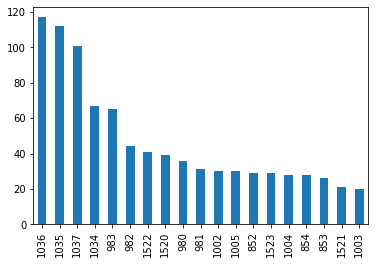

In [55]:
# Boblioteca MatPlotLib
# Gráfico de Barras
df['LojaID'].value_counts(ascending=False).plot.bar()

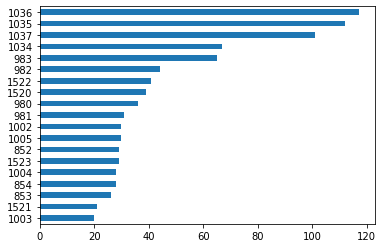

In [57]:
df['LojaID'].value_counts(ascending=True).plot.barh()

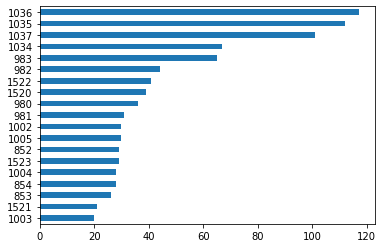

In [58]:
df['LojaID'].value_counts(ascending=True).plot.barh();

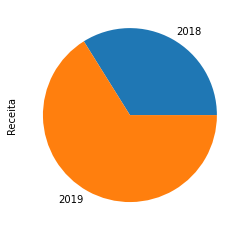

In [61]:
# Grafico de Pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

In [62]:
df['Cidade'].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total de Vendas')

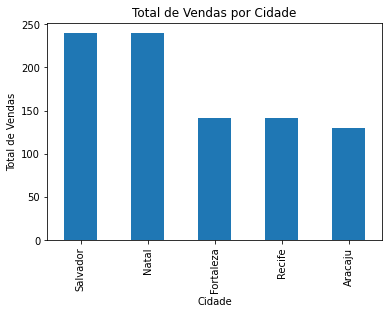

In [64]:
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total de Vendas por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas')

Text(0, 0.5, 'Total de Vendas')

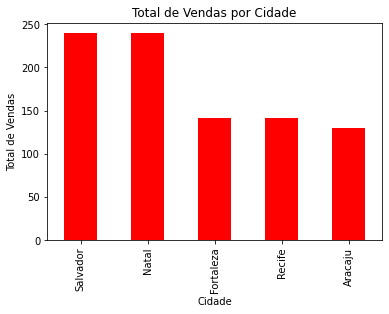

In [67]:
# Alterando a cor
df['Cidade'].value_counts().plot.bar(title='Total de Vendas por Cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas')

In [68]:
# Alterando o estilo
plt.style.use('ggplot')

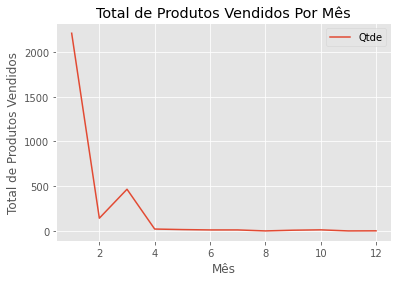

In [76]:
df.groupby(df['Mes_Venda'])['Qtde'].sum().plot(title='Total de Produtos Vendidos Por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Produtos Vendidos')
plt.legend();

In [77]:
df.groupby(df['Mes_Venda'])['Qtde'].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [78]:
df_2019 = df[df['Ano_Venda'] == 2019]

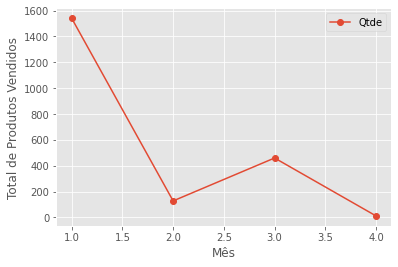

In [80]:
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker='o')
plt.xlabel('Mês')
plt.ylabel('Total de Produtos Vendidos')
plt.legend();

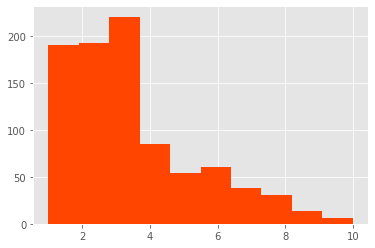

In [82]:
plt.hist(df['Qtde'], color='orangered');

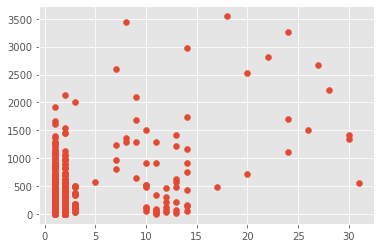

In [87]:
plt.scatter(x = df_2019['Dia_venda'], y = df_2019['Receita']);

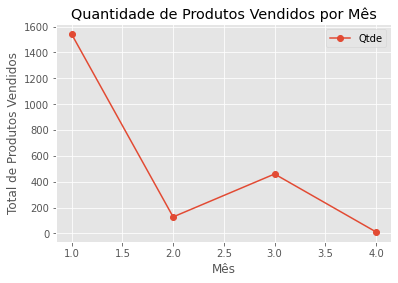

In [88]:
# Salvando em png
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker='o')
plt.title('Quantidade de Produtos Vendidos por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Produtos Vendidos')
plt.legend()
plt.savefig('Grafico de Teste.png')